# Pythonによる理解しやすいデータ探索
[Pedro Marcelino](http://pmarcelino.com) - February 2017


----------
本ドキュメントは、1.Pythonによるデータ探索の方法論をケースを用いて説明する。元はKaggelのComprehensive data exploration with Pythonである。 英語でComprehensiveというと総合保険に代表される「総合的な」という意味で用いられることが多いが、説得力のあるデータや事実を使って説明しているようなケースでは「わかりやすい、理解力のある」という意味で学校のクラスの名称に用いられる。本ドキュメントは、意訳した上で、全体のステップを解説していく。大きなステップとしては、2.前準備、3.洗い出し、4.欠損データ・外れ値の研究、5.結論を導くとなっており。全てPythonを使ってコーディングしながらデータ探索方法に慣れることを狙う。

ステップ
1. Pythonによるデータ探索
2. 前準備
3. 洗い出し
4. 欠損値・外れ値の研究
5. 結論を導く

#  前準備

----------
前準備においては、Pythonで使うライブラリのImport、与えられたデータを眺める、ゴールを知る、ということを行う。



##  Pythonで使うライブラリのImport

In [1]:
#import する
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 与えられたデータを眺める

In [2]:
#pandas を使って今回のデータに何が入っているか確認する。
df_train = pd.read_csv('all/train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
#カラムのみを取得する。
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## ゴールを知る

さて、ここで何を知るべきであろうか。

オススメしたいのは、Excelなどにこれらの変数をそれぞれ打ち込みながら考えることである。
* 変数- 変数名
* タイプ -  '数値'または 'カテゴリ'
* セグメント - 変数のセグメント。（「OverallQual=満足度」、「TotalBsmtSF=地下の広さ近所」、など）
* 期待 - 「SalePrice」の変動影響に関する期待。可能な値として、「高」、「中」、「低」のカテゴリスケールを使用
* 結論 - 変数の重要性に対する結論、「期待」と同じカテゴリーなどがわかりやすいだろう
* コメント - コメント

また、データをながめながら、以下のような疑問をたくさん持つとよい。
* 「なるほどこれは家を買うときのデータかな（持ち家を考えるときに石工単板タイプとか気にするだろうか）」、
* 「もしそうなら、この変数はどれくらい重要なのだろうか？ （「悪い」の代わりに「優れた」材料を外部に与えることの影響と、「良い」の代わりに「優秀」を有することの影響は何にどれくらい影響するのか？）」、
* 「情報はすでに他の変数に記述されていますか？ （'LandContour'土地の平坦度を与える場合、本当に 'LandSlope'を知る必要があるか？）」



---------

さて、
本データ探索は、上記の眺めを経ると、「Sales Price」の探求であることがわかってくる。



---------

# 洗い出し

----------
洗い出すプロセスにおいては、全体像を知る、相関の高いものによっていく、ということを行う。その前にここでは、そもそも統計データの種類について紹介して行きたい。

## 統計データ表現の紹介
ここでは、まず記述統計、ヒストグラム、歪度(わいど)Kurtosis(尖度(せんど)、散布図、箱ひげ図を紹介する。

先に結論を言っておくと、以下のような情報はこれらのデータ表現方法で判明する。

* 'GrLivArea（駐車場の広さ）'と 'TotalBsmtSF（敷地面積）'は 'SalePrice（売値）'と線形関係にあるようだ。。
* 'OverallQual(全体仕上がり)'と 'YearBuilt（築年数）'も 'SalePrice'と関連しているようだ。 



In [4]:
# 記述統計を出す
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

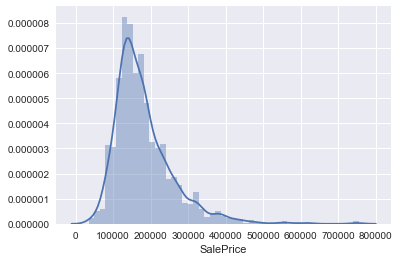

In [5]:
#ヒストグラムにする
sns.distplot(df_train['SalePrice']);

In [6]:
#Skewness(歪度(わいど)）とKurtosis(尖度(せんど))
#Skewnessは、左右対称性分布。山が左にずれて裾が右に伸びているときは正の値を、山が右にずれて裾が左に伸びているときは負の値をとる。正規分布では0となる。
#Kurtosisは、0未満のときは尖りが緩やかで裾が短い。0より大きいときは尖りが急で裾が長い。正規分布では0となる
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


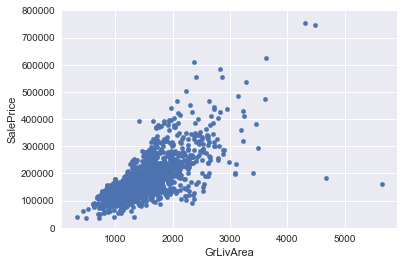

In [7]:
#散布図：GrLivAreaとSalePrices
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

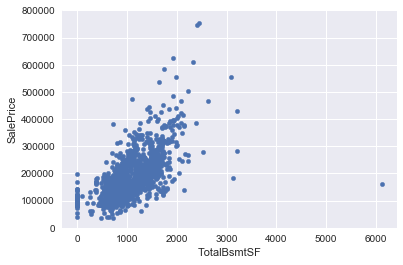

In [8]:
#散布図：totalbsmtsfとSalePricesscatter
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

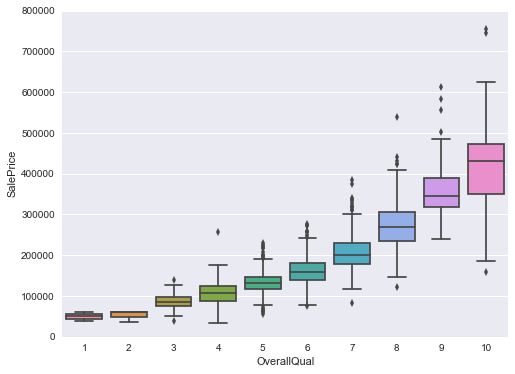

In [9]:
#箱ひげ図：overallqualとsaleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

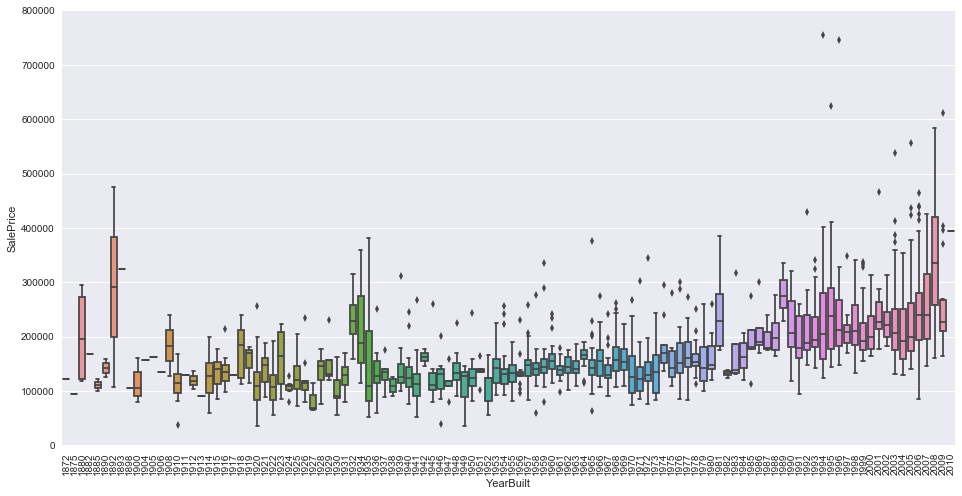

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## 全体を知る

これまでは、直感に基づいて、重要だと思った変数についてグラフ等を作って遊んだ。しかしながらエンジニアとしてはこれらのやり方はお勧めできない。つまり主観に頼った方法論ではなく、もっと客観的に攻めるべきである。
ここでは全体を知ると称して、以下の方法をお勧めする。

* 相関行列を作って変数間の関係（ヒートマップ）から客観的に見つける
* 'SalePrice' 相関関係（ズームヒートマップ）を作る
* 一番相関がある場所を、散布図にする

###   相関行列を作って変数間の関係（ヒートマップ）から客観的に見つける

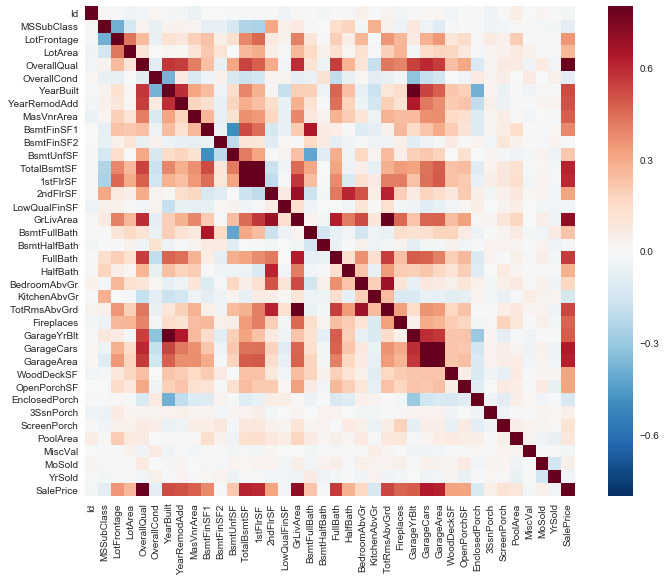

In [11]:
#相関行列を書くcorrelation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

このヒートマップは、変数間関係をすばやく概観する最良の方法だと考える。 
2つの赤い色の四角がある。最初の変数は 'TotalBsmtSF'と '1stFlrSF'変数を参照し、2番目の変数は 'GarageX'変数である。
いずれの場合も、これらの変数間の相関がどの程度重要であるかを示す。
今回は、「SalePrice」の相関関係である。
つまり、目をこらすと、「GrLivArea」、「TotalBsmtSF」、「OverallQual」が赤くなっており、
それらにズームアップしていく必要があることがわかる。

### 'SalePrice' の相関関係（ズームヒートマップ）を作る

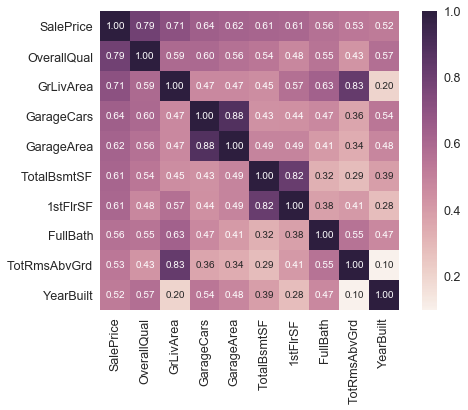

In [12]:
#SalePriceに関する相関行列
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* 'OverallQual'、 'GrLivArea'、 'TotalBsmtSF'は 'SalePrice'と強く相関している。
* 'GarageCars'と 'GarageArea'は、最も強く相関する変数の一部である。ちなみにガレージに収まる車の数はガレージの面積の結果である。 'GarageCars'と'GarageArea'は、双子の兄弟のようなもので区別することは不可能。したがって、分析にはこれらの変数のうちの1つだけが必要となる。（GarageCarsは 'SalePrice'との相関が高いので保つ）。
* 'TotalBsmtSF'と '1stFloor'も双子の兄弟である。 'TotalBsmtSF'は、私たちの最初の推測が正しかったと言うことができます（「どういうわけで、私たちは何を期待できますか？」）。
* 'YearBuiltは'SalePrice'と少し相関があるようだ。

散布図にする。

### 一番相関がある場所を、散布図にする

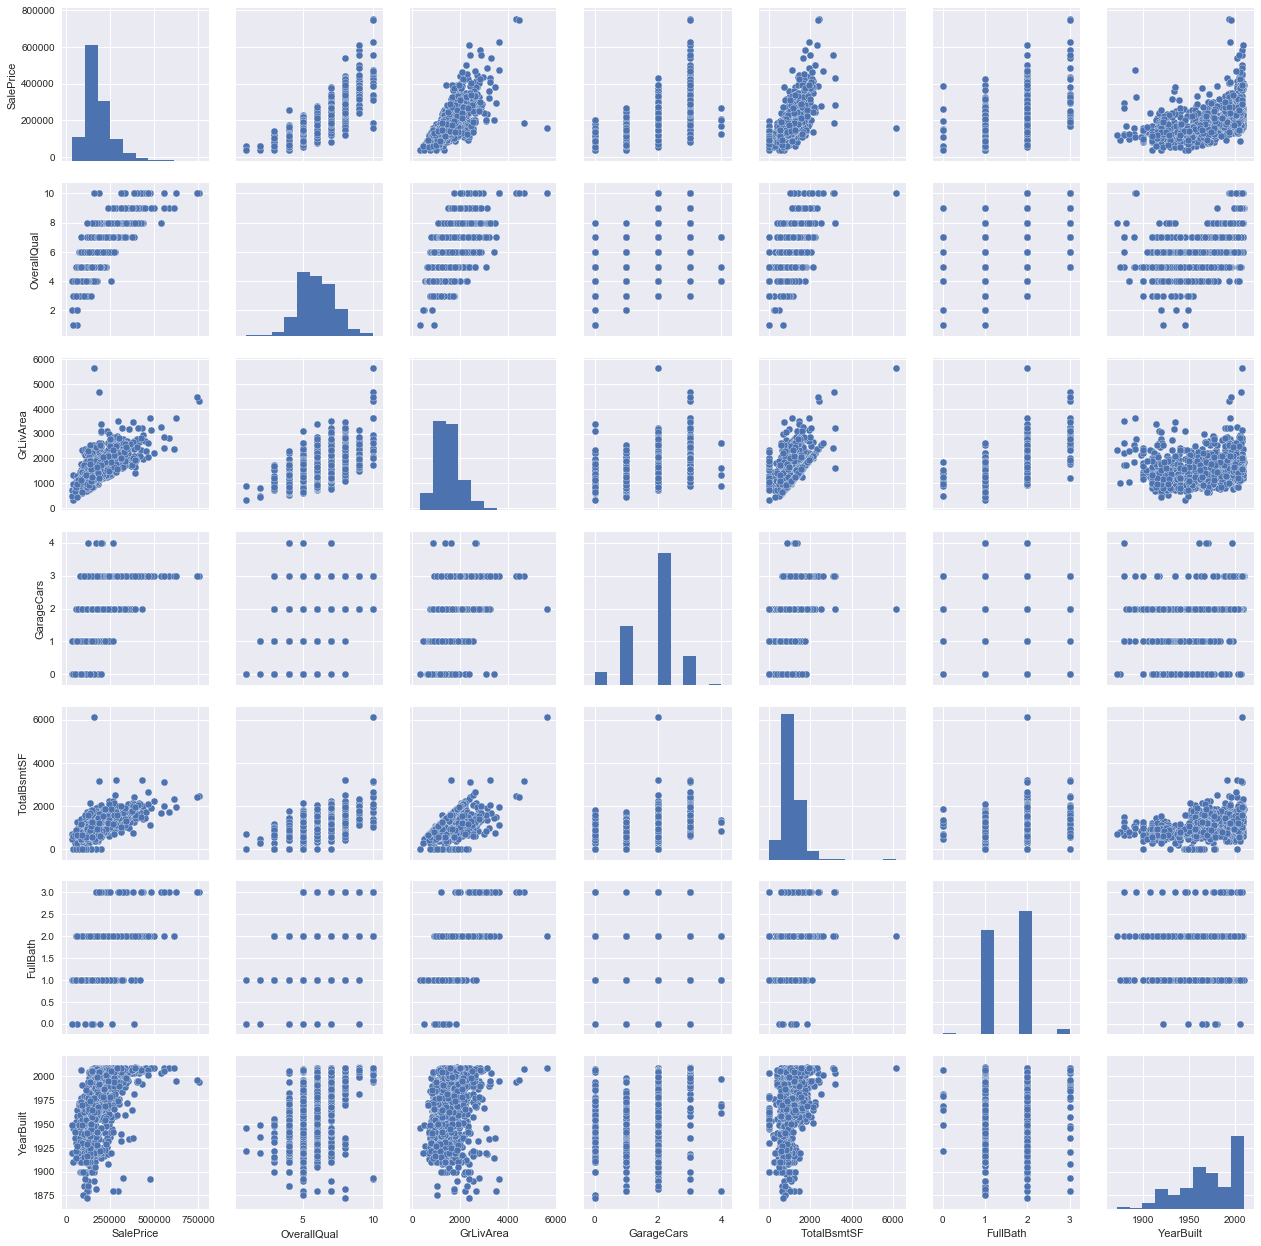

In [13]:
#散布図
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

メガ・スキャター・プロットは、変数の関係についてさらに大くのデータをくれる。


面白いのは「TotalBsmtSF」と「GrLiveArea」の間であろう。
この図では、点が線のように線を引いていることがわかる。
直線はほぼ境界線のようにみることもできる。


「SalePrice」と「YearBuilt」に関するプロットも面白い。 


# 欠損値と外れ値の研究

---------

ここでは、欠損値と外れ値の研究を行う。

欠損値を考えるというのは、サンプルサイズの縮小を意味する可能性があるため実践的な意味でとても重要である。

* 欠けているデータはどれくらいの頻度であるのか？
* データが不足しているか、パターンがあるか？

このような質問は重要である。


## 欠損値の研究

In [14]:
#欠損データ
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


データの15％以上が欠落している場合は、対応する変数を削除し、それが存在しなかったことにする。

ポイントは：このデータがなければ大変なことになるかです。
それらのほとんどは家を買うときに考えている側面ではないため（データが欠落している理由かもしれない）
重要ではないからである。

削除する必要がある一連の変数は（「PoolQC」、「MiscFeature」、「FireplaceQu」、「Alley」、「GarageX」など）がある。


不足しているデータは同じ観測セットを参照する。
ガレージに関する最も重要な情報は「GarageCars」で表現されており、
欠落しているデータの5％について話していることを考慮して、前述の「GarageX」変数を削除できる。
同じロジックが 'BsmtX'、'MasVnrArea'と 'MasVnrType'に関して、これらの変数は必須ではないと考えることができる。
さらに、すでに考慮されている 'YearBuilt'と 'OverallQual'と強い相関関係がある。
したがって、 'MasVnrArea'と 'MasVnrType'を削除すると、情報は失われない。
最後に、「電気」には1つの見逃しがある。これは単なる観測であるため、
この観測値を削除する。
つまり、不足しているデータを処理するために、変数 'Electrical'を除いて、欠損データを含むすべての変数を削除することになった 

In [15]:
#欠損データを扱う
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

## 外れ値の研究（Out liars）

外れ値は、モデルに著しい影響を与える可能性があり、貴重な情報源になる可能性があるため注意を払って見ていく。
ここでは、「SalePrice」の標準偏差と散布図を簡単に分析する。

### 一変数の解析

外れ値としての観測値を定義するしきい値を設定する。 そのために、データを標準化する。 データ値を平均値0および標準偏差1に変換することを意味する。

In [16]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


*Outerrange(Low)の値は似ていて、0からあまり離れてはいない。
*Outerrange(High)の値は0からずっと離れていて、7の値は実際には範囲外である。

ここでは、これらの値のいずれも外れ値としては考慮しませんが、これらの2つの値に注意する必要があります。

### 二変量分析（Bivariate analysis）

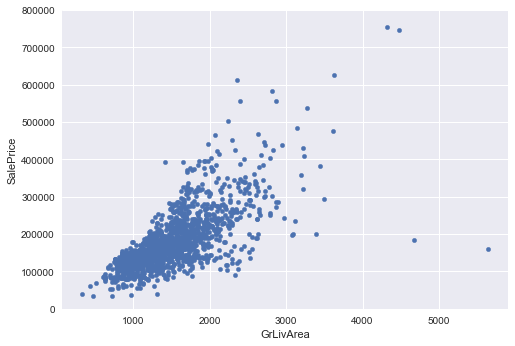

In [17]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

右手方向にある、より大きな「GrLivArea」を持つ2つの値は奇妙に見える。 
なぜこれが起こっているのか推測することができるのではないだろうか。
多分、農業地域を指し、低価格であるだろうと。 
実態は、そうではないかもしれないがこの2つの点が典型的な事例を代表するものではないと確信はできる。 
したがって、それらを異常値として定義して削除する。

#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

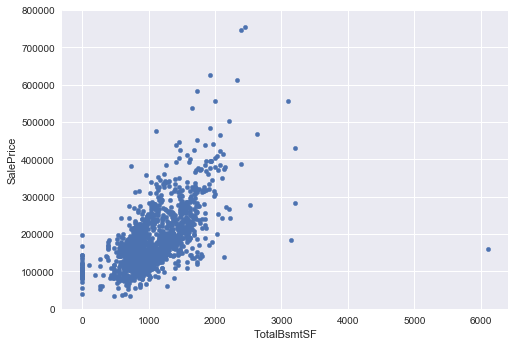

In [18]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

他にも、観測値（たとえばTotalBsmtSF> 3000）を排除したいと思うかもしれないが、そこまではそもそも存在しても存在しなくても影響がないためそのままにする。

# 結論を導く

これまでやってきた情報から結論を導くために、統計的前提条件をどのように遵守しているかを深く理解しておこう
Hairらによると、 （2013）、4つの前提条件がテストされるべきである(本章では使用しないが、覚えておこう)
* 正規性 - データは正規分布のように見えるということ。
（例：t統計）。この練習では、「SalePrice」の単変量正規性をチェックした。
考慮すべきもう一つの詳細は、大きなサンプル（> 200回の観測）かどうか。、正規性を追求するとを解くと、他の多くの問題（例えば、異質性）を避けることができる。
* 均質性 - 均質性は、目的変数が説明変数の範囲全体で等しいレベルの分散を示すという仮定を指す（Hair et al。、2013）。
* 線形性 - 線形性を評価するのは散布図を調べて線形パターンを検索する。
パターンが線形でない場合、データ変換を探索する価値がある。
* 相関エラーの欠如 - 相関エラーは、あるエラーが別のエラーと関連している場合に発生する。

### 正規性を求めて

以下のような方法で'SalePrice'をテストすることである：

* ヒストグラム-尖度と歪度。
* 正規確率プロット-正規分布を表す対角線に厳密に従う分布。

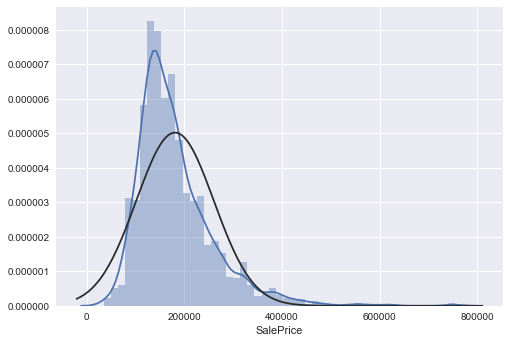

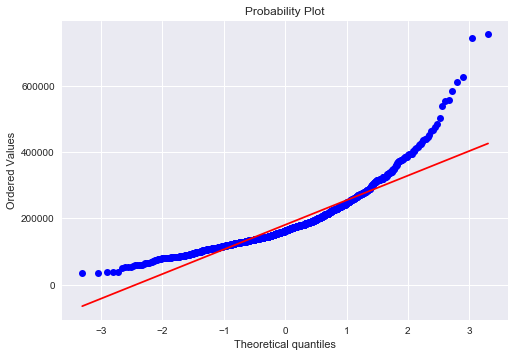

In [19]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

「SalePrice」は正規ではない。

「ピーク」、正の歪度を示し、対角線に沿っていない。(青い線と黒い線の天辺）

これは正に歪曲しているので、ログ変換を行う。

In [20]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

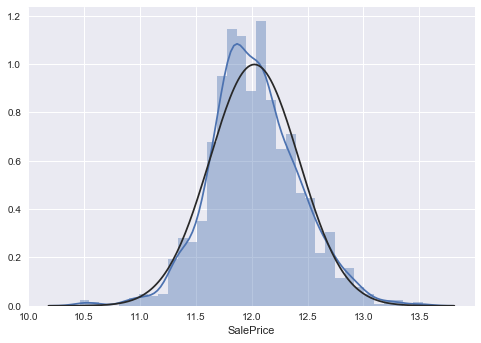

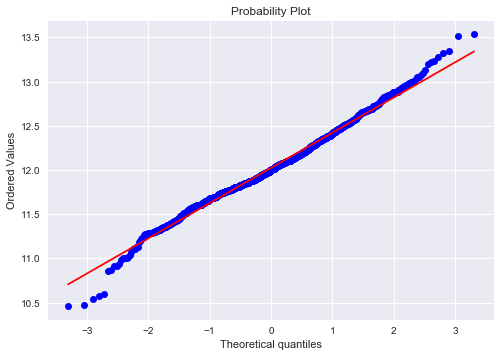

In [21]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

終了。 'GrLivArea'についても実行する。

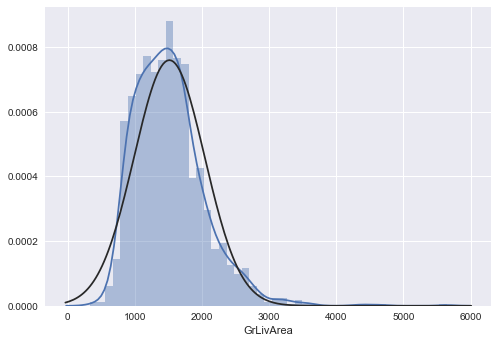

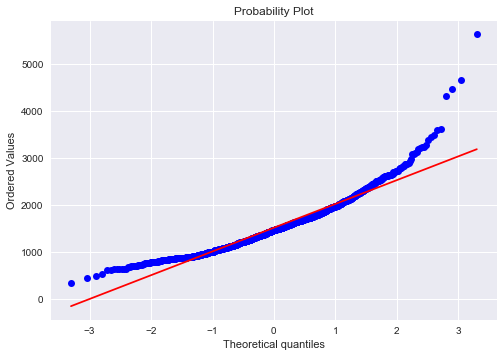

In [22]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

これも歪みがある。

In [23]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

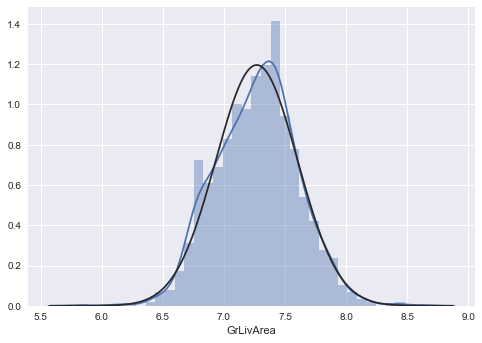

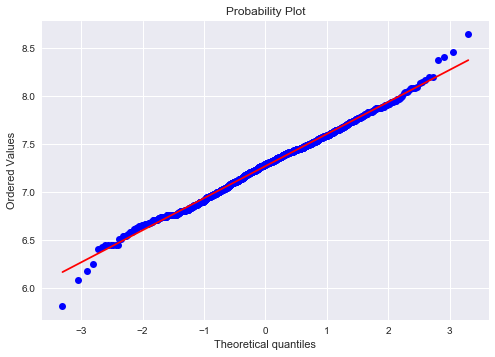

In [24]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

次。

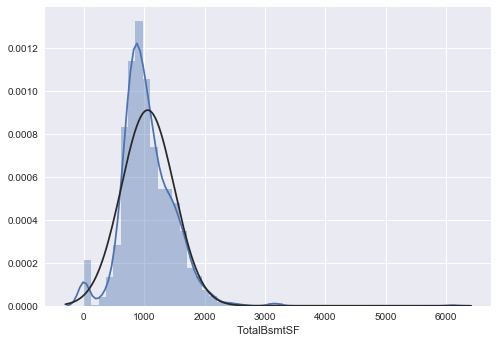

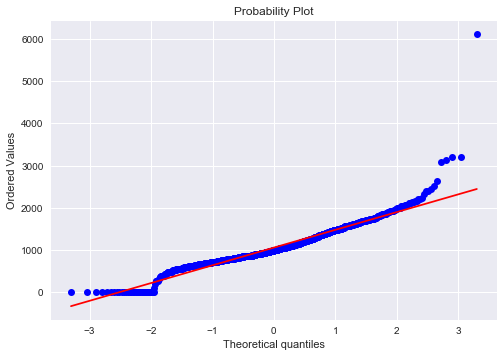

In [25]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [26]:
TotalBsmtSFからは、新しい特徴がわかった。

*歪み。
*価値ゼロの観測（地下のない住宅）がかなり多い＝ゼロという値ではログの変換を実行できない

ここでログ変換を適用するには、基底（バイナリ変数）を持つか持っていないかを確かめる。
次に、ゼロ以外のすべての観測値に対してログ変換を行い、値ゼロの観測値は無視する。
このようにして、私たちは地下を持つかどうかの影響を失うことなく、データを変換することができる。

SyntaxError: invalid character in identifier (<ipython-input-26-b2c8ec5ed737>, line 1)

In [27]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [28]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

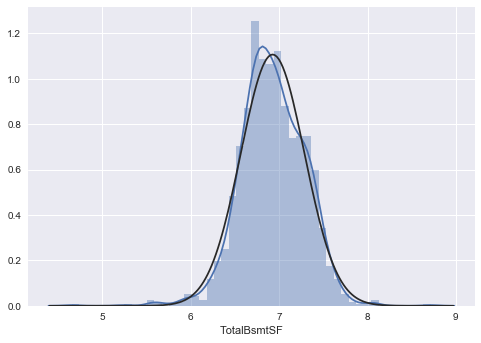

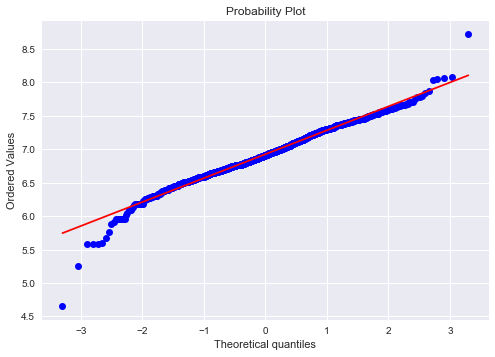

In [29]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### 均質性を求めて

2つのメトリック変数の均質性をテストする最良の方法は、グラフである。
均等分散からの逸脱は、円錐（グラフの一方の側に小さな分散、反対側に大きな分散）
またはダイヤモンド（分布の中心に多数の点）のような形状によって示される。
'SalePrice'と 'GrLivArea'でやってみる。

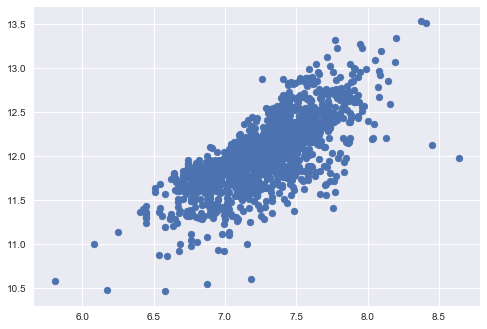

In [30]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

散布図の以前のバージョン（ログ変換の前）は円錐形をしていたが、ご覧のように、現在の散布図はもはや円錐形をしていない。それが正常の力です！いくつかの変数の正規性を保証するだけで、我々は均等分散問題を解決することができた。

では、 'SalePrice'と 'TotalBsmtSF'を確認しよう。

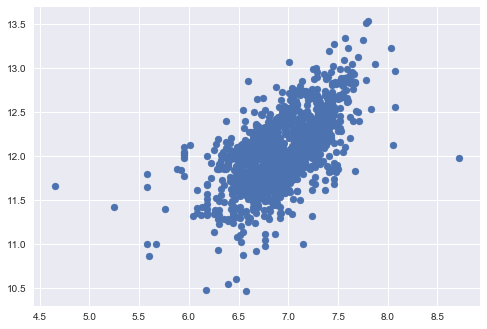

In [31]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

一般的に、「SalePrice」は、「TotalBsmtSF」の範囲で均等な分散レベルを示すと言える。

### ダミー変数

In [32]:
#ダミー変数に変換 
df_train = pd.get_dummies(df_train)

# 結論

このカーネルでは、実際に、[Hair et al。 （2013）]（https://amzn.to/2uC3j9p）。
が提案していた多くの方法論を実行した。「SalePrice」にフォーカスし、最も相関のある変数を導きだした。欠損値と外れ値も確認し、いくつかの基本的な統計的テスト（正規性、均質性）を行った。またカテゴリー変数をダミー変数に変換した。


# <b>参考文献</b>
* [My blog](http://pmarcelino.com)
* [My other kernels](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python)
* [Hair et al., 2013, Multivariate Data Analysis, 7th Edition](https://amzn.to/2JuDmvo)

# 謝辞

[João Rico](https://www.linkedin.com/in/joaomiguelrico/) はドラフトを読んでくれた。